In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
import random
import heapq

def simulacion_MMS(lam, mu, s, T, seed=None):
    if seed is not None:
        random.seed(seed)
    t = 0.0
    queue = []
    busy_servers = 0

    wait_times = []
    system_times = []
    area_busy = 0.0

    events = []
    heapq.heappush(events, (random.expovariate(lam), 'arrival'))

    while events:
        t_next, event = heapq.heappop(events)
        if t_next > T:
            break

        t = t_next

        if event == 'arrival':
            if busy_servers < s:
                busy_servers += 1
                service_time = random.expovariate(mu)
                heapq.heappush(events, (t + service_time, 'departure'))
                wait_times.append(0.0)
                system_times.append(service_time)
            else:
                queue.append(t)
            heapq.heappush(events, (t + random.expovariate(lam), 'arrival'))

        else:
            busy_servers -= 1

            if queue:
                arrival_time = queue.pop(0)
                wait = t - arrival_time
                service_time = random.expovariate(mu)

                wait_times.append(wait)
                system_times.append(wait + service_time)

                busy_servers += 1
                heapq.heappush(events, (t + service_time, 'departure'))

    avg_wait = sum(wait_times) / len(wait_times)
    avg_system = sum(system_times) / len(system_times)

    return {
        "avg_wait": avg_wait,
        "avg_system_time": avg_system,
        "wait_times": wait_times,
    }

In [6]:
def hours_to_seconds(results):

    converted = results.copy()

    converted["avg_wait"] *= 3600
    converted["avg_system_time"] *= 3600
    converted["wait_times"] = [x * 3600 for x in converted["wait_times"]]

    return converted


In [115]:
lam = 3.73
mu = 9
s = 2
T = 1500

results = simulacion_MMS(lam, mu, s, T)

results_seconds = hours_to_seconds(results)

print("Tiempos promedio de espera(sec):", results_seconds["avg_wait"])
print("Tiempo promedio en el sistema o (sec):", results_seconds["avg_system_time"])

Tiempos promedio de espera(sec): 17.486961327682437
Tiempo promedio en el sistema o (sec): 416.47702793251085


In [59]:
results_seconds["avg_system_time"]- results_seconds["avg_wait"]

402.91177334824454

In [19]:
import pandas as pd
df = pd.read_csv("clean_data.csv")
df.head()

,vru+line,date,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,server,caja
0,AA0216,991201,0:00:00,0:00:00,0,7:01:48,7:08:31,403,Z2ARIE,1
1,AA0216,991201,0:00:00,0:00:00,0,7:54:09,7:56:44,155,Z2ARIE,1
2,AA0216,991201,0:00:00,0:00:00,0,8:37:56,8:39:01,65,Z2ARIE,1
3,AA0216,991201,9:14:13,9:14:38,25,9:14:37,9:21:18,401,Z2ARIE,1
4,AA0216,991201,0:00:00,0:00:00,0,9:23:35,9:26:15,160,Z2ARIE,1


In [64]:
df.sort_values(by="q_time", ascending=False)

,vru+line,date,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,server,caja
650,AA0216,991215,22:07:34,22:29:53,1339,22:29:53,22:37:05,432,Z2ELINOR,1
311,AA0216,991208,15:56:08,16:14:58,1130,16:14:57,16:26:29,692,Z2ARIE,1
588,AA0216,991214,20:57:31,21:15:52,1101,21:15:52,21:40:12,1460,Z2NIRIT,1
461,AA0216,991212,18:25:18,18:43:06,1068,18:43:05,18:53:05,600,Z2EYAL,2
1393,AA0216,991228,17:17:42,17:35:09,1047,17:35:07,17:44:08,541,Z2EYAL,1
...,...,...,...,...,...,...,...,...,...,...
898,AA0216,991220,0:00:00,0:00:00,0,18:09:16,18:11:00,104,Z2EYAL,1
897,AA0216,991220,0:00:00,0:00:00,0,18:03:28,18:05:12,104,Z2OFERZ,1
896,AA0216,991220,0:00:00,0:00:00,0,17:30:47,17:40:03,556,Z2EYAL,1
367,AA0216,991209,0:00:00,0:00:00,0,19:17:59,19:19:16,77,Z2EYAL,1


In [20]:
df[df['caja'] == 2]["q_time"].mean()

np.float64(97.82995951417004)

In [61]:
df[df['caja'] == 2]

,vru+line,date,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,server,caja
9,AA0216,991201,9:58:33,9:59:21,48,9:59:21,10:55:34,3373,Z2NIRIT,2
10,AA0216,991201,0:00:00,0:00:00,0,10:22:09,10:35:52,823,Z2SPIEGEL,2
14,AA0216,991201,11:52:16,11:59:05,409,11:59:04,12:00:22,78,Z2SPIEGEL,2
20,AA0216,991201,13:49:19,13:50:26,67,13:50:26,13:51:27,61,Z2NIRIT,2
22,AA0216,991201,0:00:00,0:00:00,0,14:10:11,14:11:21,70,Z2NIRIT,2
...,...,...,...,...,...,...,...,...,...,...
1514,AA0216,991230,0:00:00,0:00:00,0,18:00:33,18:02:34,121,Z2OFERZ,2
1516,AA0216,991230,0:00:00,0:00:00,0,18:21:26,18:24:03,157,Z2NIRIT,2
1518,AA0216,991230,0:00:00,0:00:00,0,18:38:34,18:43:12,278,Z2OFERZ,2
1537,AA0216,991231,8:22:09,8:22:34,25,8:22:33,8:24:05,92,Z2ELINOR,2


In [22]:
df[df['caja'] == 3]["q_time"].mean()

np.float64(70.5)

In [62]:
df[df['caja'] == 3]

,vru+line,date,q_start,q_exit,q_time,ser_start,ser_exit,ser_time,server,caja
223,AA0216,991206,17:23:35,17:24:47,72,17:24:45,17:25:12,27,GELBER,3
783,AA0216,991219,10:28:04,10:28:12,8,10:28:11,10:29:05,54,KAZAV,3
785,AA0216,991219,10:35:27,10:39:32,245,10:39:31,10:40:03,32,KAZAV,3
786,AA0216,991219,0:00:00,0:00:00,0,10:45:09,10:45:48,39,KAZAV,3
787,AA0216,991219,0:00:00,0:00:00,0,10:45:53,10:46:26,33,KAZAV,3
807,AA0216,991219,12:39:53,12:41:23,90,12:41:22,12:41:58,36,KAZAV,3
808,AA0216,991219,0:00:00,0:00:00,0,12:42:07,12:42:44,37,KAZAV,3
1057,AA0216,991222,20:13:55,20:16:24,149,20:16:24,20:18:31,127,Z2EYAL,3


In [117]:
df["q_time"].mean() +df["ser_time"].mean()

np.float64(463.40141752577324)

In [51]:
emp_zero = (df["q_time"] == 0).mean()
sim_zero = [x == 0 for x in results_seconds["wait_times"]]
av_zero = sim_zero.count(True)/len(results_seconds["wait_times"])
emp_zero, av_zero

(np.float64(0.5805412371134021), 0.9290157336260519)

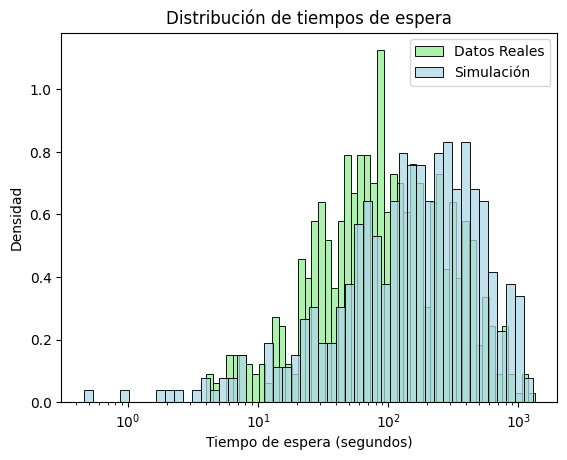

In [116]:
tiempos_espera = df['q_time']
tiempos_espera
sns.histplot(tiempos_espera, stat="density", bins=50, color="lightgreen", label="Datos Reales", log_scale=True)
sns.histplot(results_seconds["wait_times"], stat="density", bins=50, color="lightblue", label="Simulación", log_scale=True)
plt.title("Distribución de tiempos de espera")
plt.xlabel("Tiempo de espera (segundos)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

In [85]:
def simulacion_MMS_threshold(lam, mu, base_s, max_s, wait_threshold, T):

    t = 0.0
    queue = []

    current_s = base_s
    busy_servers = 0

    wait_times = []
    system_times = []

    events = []
    heapq.heappush(events, (random.expovariate(lam), 'arrival'))

    while events:
        t_next, event = heapq.heappop(events)
        if t_next > T:
            break

        t = t_next

        if event == 'arrival':

            if busy_servers < current_s:
                busy_servers += 1
                service_time = random.expovariate(mu)
                heapq.heappush(events, (t + service_time, 'departure'))
                wait_times.append(0.0)
                system_times.append(service_time)
            else:
                queue.append(t)


            if queue:
                longest_wait = t - queue[0]
                if longest_wait > wait_threshold:
                    if current_s < max_s:

                        current_s += 1

            heapq.heappush(events, (t + random.expovariate(lam), 'arrival'))

        else:
            busy_servers -= 1

            scale_down = not queue

            if scale_down and current_s > base_s:
                current_s -= 1

            if busy_servers < current_s and queue:
                arrival_time = queue.pop(0)
                wait = t - arrival_time
                service_time = random.expovariate(mu)

                wait_times.append(wait)
                system_times.append(wait + service_time)

                busy_servers += 1
                heapq.heappush(events, (t + service_time, 'departure'))

    avg_wait = sum(wait_times) / len(wait_times) if wait_times else 0
    avg_system = sum(system_times) / len(system_times) if system_times else 0

    return {
        "avg_wait": avg_wait,
        "wait_times": wait_times,
        "avg_system_time": avg_system,
    }

In [105]:
results_d = simulacion_MMS_threshold(lam=3.73, mu=9, base_s=2, max_s=3, wait_threshold=.025, T=1500)
resultsd_seconds = hours_to_seconds(results_d)
print("Avg wait (sec):", resultsd_seconds["avg_wait"])
print("Avg system time (sec):", resultsd_seconds["avg_system_time"])


Avg wait (sec): 13.783420173206302
Avg system time (sec): 409.24845561876845


<Axes: xlabel='q_time', ylabel='Density'>

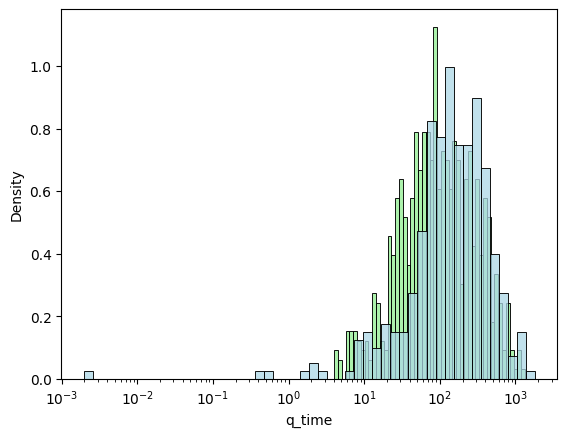

In [106]:
tiempos_espera = df['q_time']
tiempos_espera
sns.histplot(tiempos_espera, stat="density", bins=50, color="lightgreen", label="Datos Reales", log_scale=True)
sns.histplot(resultsd_seconds["wait_times"], stat="density", bins=50, color="lightblue", label="Simulación", log_scale=True)